In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("/content/drive/MyDrive/Datasets/CSV and Excel files/Top-50-musicality-global.xlsx")
df.head()

,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.0447,...,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,...,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,...,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.3120,...,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.0504,...,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


In [ ]:
df.shape

(3589, 21)

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(3583, 21)

In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.drop(["Markets"], axis=1, inplace=True)

In [ ]:
df.head()

,Country,Track Name,Artist Name,Album Name,Popularity,Date,Danceability,Acousticness,duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,0.711,0.0447,206020,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,Global,greedy,Tate McRae,greedy,100,2023-09-15,0.750,0.2560,131872,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,0.537,0.8270,184061,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,0.790,0.3120,183551,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,0.596,0.0504,229478,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


In [ ]:
df.rename({"duration": "Duration"}, axis=1, inplace=True)

In [ ]:
df["Artist Name"].value_counts().nlargest(10)

,count
Artist Name,
Bad Bunny,163
Jung Kook,147
Taylor Swift,118
KAROL G,62
Doja Cat,56
Feid,46
Tate McRae,44
iñigo quintero,42
Kenya Grace,37


# EXPLORATORY DATA ANALYSIS

### Top 10 Artists by Popularity

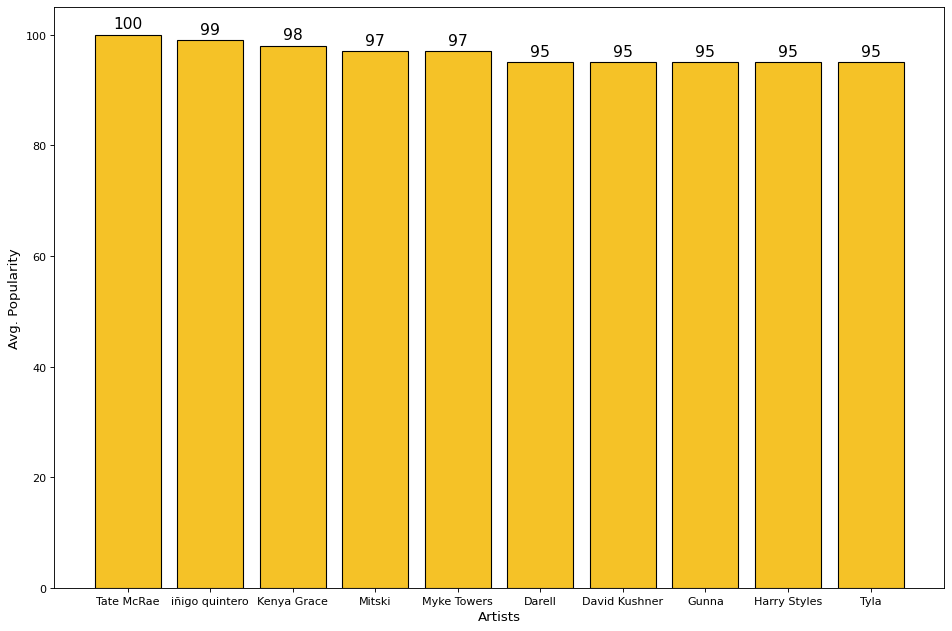

In [ ]:
topArtistsPopularity = df.groupby("Artist Name")["Popularity"].mean().nlargest(10)
topArtistsPopularity.astype(int)

artists = topArtistsPopularity.index
artistsPopularity = topArtistsPopularity.values

plt.figure(figsize=(12, 8), dpi=80)

barChart = plt.bar(artists, artistsPopularity, color="#F5C227", edgecolor="black")
plt.bar_label(barChart, fontsize=14, color="black", padding=3)
plt.xlabel("Artists", fontsize=12)
plt.ylabel("Avg. Popularity", fontsize=12)
plt.tight_layout()

In [ ]:
df.Date = df.Date.astype("datetime64[ns]")

In [ ]:
# many dates!
df.Date.dt.year.value_counts()

,count
Date,
2023,2699
2022,394
2021,82
2019,69
2013,52
2016,33
2018,29
2020,29
2014,28


### Avg. Popularity over time based on year and month


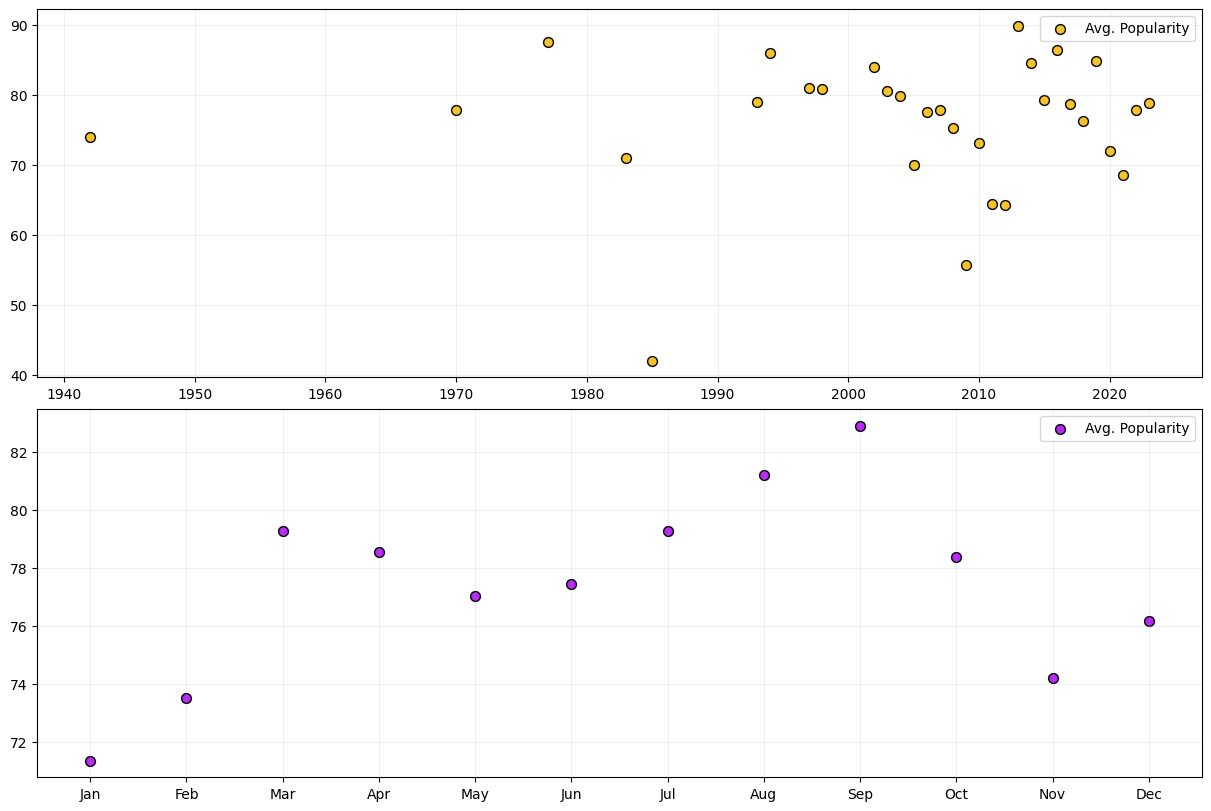

In [ ]:
avgPopByYear = df.groupby([df.Date.dt.year])["Popularity"].mean()
avgPopByMonth = df.groupby([df.Date.dt.month])["Popularity"].mean()
avgPopByMonth.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), constrained_layout=True)

axes[0].scatter(avgPopByYear.index, avgPopByYear.values, color="#F5C227",
                  label="Avg. Popularity", edgecolor="black", s=50)
axes[0].legend()
axes[0].grid(alpha=0.2)

axes[1].scatter(avgPopByMonth.index, avgPopByMonth.values, color="#B427F5",
                  label="Avg. Popularity", edgecolor="black", s=50)
axes[1].legend()
axes[1].grid(alpha=0.2)

plt.show()

In [ ]:
df.head()

,Country,Track Name,Artist Name,Album Name,Popularity,Date,Danceability,Acousticness,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,0.711,0.0447,206020,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,Global,greedy,Tate McRae,greedy,100,2023-09-15,0.750,0.2560,131872,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,0.537,0.8270,184061,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,0.790,0.3120,183551,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,0.596,0.0504,229478,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


In [ ]:
df.Country.unique()

array(['Global', 'DEU', 'SAU', 'ARG', 'AUS', 'AUT', 'BLR', 'BRA', 'BGR',
       'BEL', 'CAN', 'CHL', 'COL', 'KOR', 'CRI', 'DNK', 'ARE', 'ECU',
       'EGY', 'SLV', 'SVK', 'ESP', 'USA', 'EST', 'PHL', 'FIN', 'FRA',
       'GRC', 'GTM', 'HND', 'HKG', 'HUN', 'IND', 'IDN', 'IRL', 'ISL',
       'ISR', 'ITA', 'JPN', 'KAZ', 'CZE', 'DOM', 'LVA', 'LTU', 'NLD',
       'LUX', 'MYS', 'MAR', 'MEX', 'NIC', 'NGA', 'NOR', 'NZL', 'PAK',
       'PAN', 'PRY', 'PER', 'POL', 'PRT', 'GBR', 'ROU', 'SGP', 'ZAF',
       'SWE', 'CHE', 'THA', 'TWN', 'TUR', 'UKR', 'URY', 'VEN', 'VNM'],
      dtype=object)

### Danceability vs Acousticness

Text(0, 0.5, 'Avg. Acousticness')

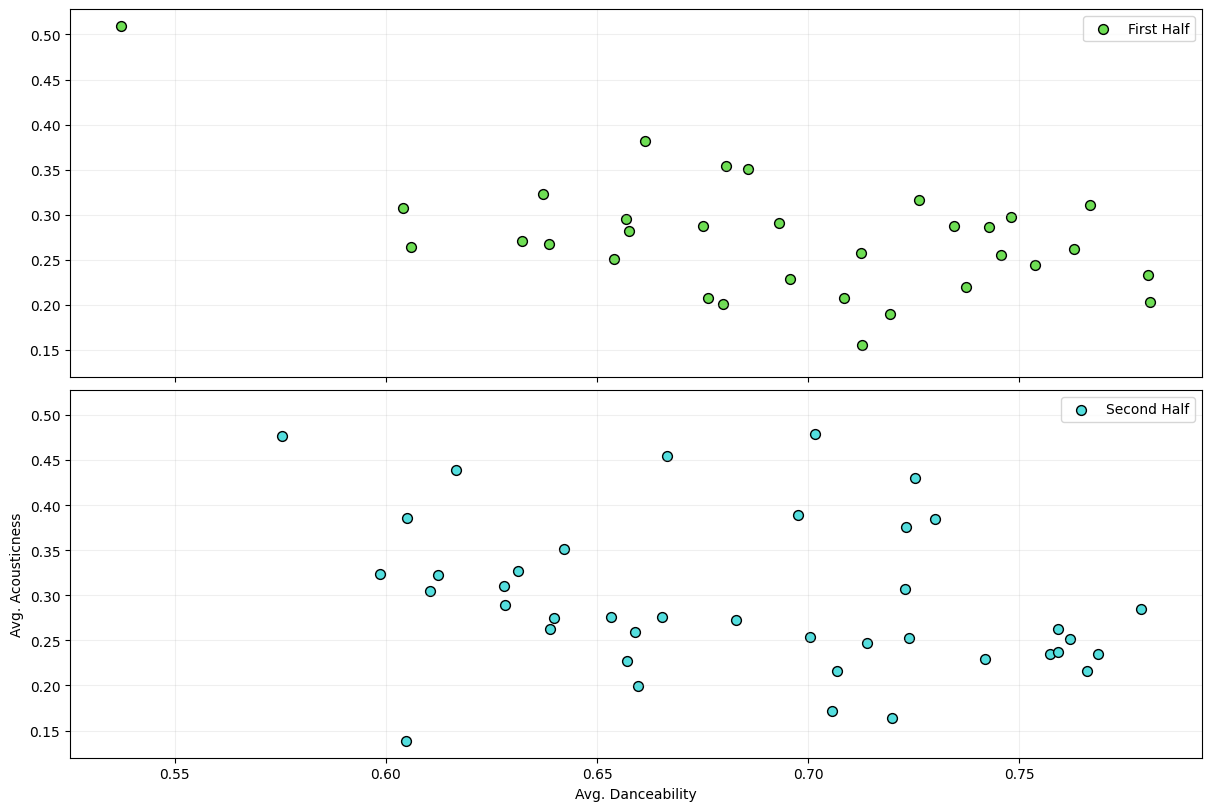

In [ ]:
pivot = df.pivot_table(index="Country", values=["Danceability", "Acousticness"], aggfunc="mean")
pivotFirstHalf = pivot.iloc[:32, [0, 1]]
pivotSecondHalf = pivot.iloc[32:, [0, 1]]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8),
                         constrained_layout=True, sharex=True, sharey=True)

axes[0].scatter(x=pivotFirstHalf["Danceability"], y=pivotFirstHalf["Acousticness"],
                edgecolor="black", color="#6EDE54", s=50, label="First Half")
axes[0].grid(alpha=0.2)
axes[0].legend()

axes[1].scatter(x=pivotSecondHalf["Danceability"], y=pivotSecondHalf["Acousticness"],
                edgecolor="black", color="#54DEDE", s=50, label="Second Half")
axes[1].grid(alpha=0.2)
axes[1].legend()
axes[1].set_xlabel("Avg. Danceability")
axes[1].set_ylabel("Avg. Acousticness")


In [ ]:
df.head()

,Country,Track Name,Artist Name,Album Name,Popularity,Date,Danceability,Acousticness,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,0.711,0.0447,206020,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,Global,greedy,Tate McRae,greedy,100,2023-09-15,0.750,0.2560,131872,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,0.537,0.8270,184061,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,0.790,0.3120,183551,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,0.596,0.0504,229478,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


In [ ]:
#Find the top N songs by Energy, Danceability and Positiveness
topSongsEnergy = df.nlargest(10, "Energy")
topSongsDanceability = df.nlargest(10, "Danceability")
topSongsPositiveness = df.nlargest(10, "Positiveness")

### Popularity Stats

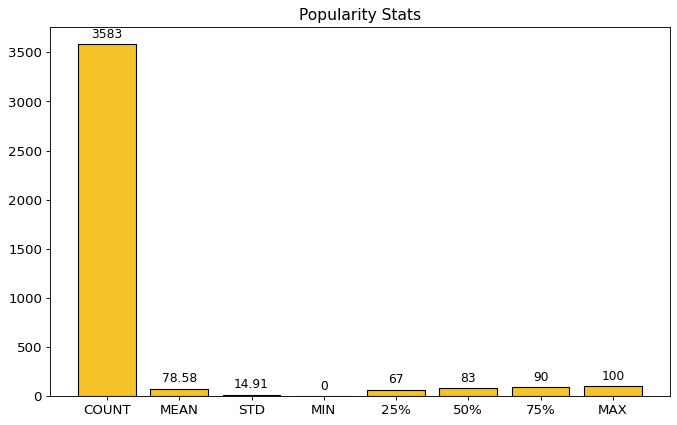

In [ ]:
pd.set_option("display.float_format", "{:.2f}".format)


describeTable = df.describe(exclude=["object"], include=["float64", "int64"])
describeTable = describeTable.astype(np.float64)
# uppercase and make some rounding
describeTable.index = [index.upper() for index in describeTable.index]
describeTable.iloc[1, 0] = round(describeTable.iloc[1, 0], 2)
describeTable.iloc[2, 0] = round(describeTable.iloc[2, 0], 2)


plt.figure(figsize=(10, 6), dpi=80)
barChart = plt.bar(describeTable["Popularity"].index, describeTable["Popularity"].values, color="#F5C227", edgecolor="black")
plt.bar_label(barChart, fontsize=11, padding=3)
plt.title("Popularity Stats", fontsize=14)
plt.tick_params(axis="both", labelcolor="black", labelsize=12)



### Which albums have the highest energy?


<Axes: title={'center': 'Albums with the highest Energy'}, xlabel='Album Name'>

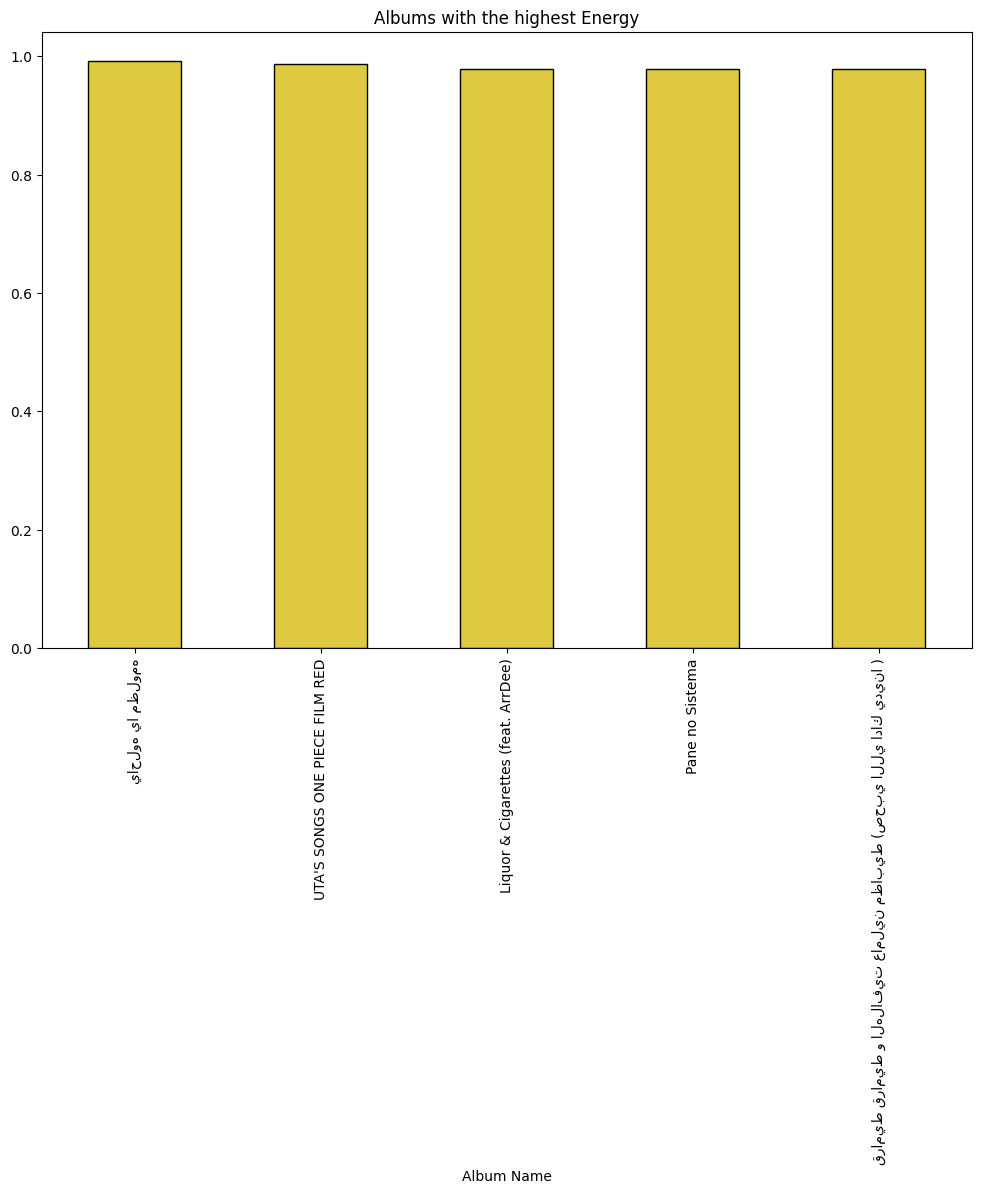

In [ ]:
df.groupby("Album Name")["Energy"].mean().nlargest(5).plot(figsize=(12, 8),
    kind="bar", edgecolor="black", color="#DEC940",
    title="Albums with the highest Energy")



In [ ]:
df.head()

,Country,Track Name,Artist Name,Album Name,Popularity,Date,Danceability,Acousticness,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,0.71,0.04,206020,0.81,0.00,2,0.34,-4.39,0,0.10,106.02,4,0.82
1,Global,greedy,Tate McRae,greedy,100,2023-09-15,0.75,0.26,131872,0.73,0.00,6,0.11,-3.18,0,0.03,111.02,1,0.84
2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,0.54,0.83,184061,0.42,0.00,5,0.14,-8.72,1,0.03,98.22,4,0.52
3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,0.79,0.31,183551,0.83,0.00,11,0.08,-4.18,1,0.04,124.99,4,0.87
4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,0.60,0.05,229478,0.66,0.00,0,0.13,-7.35,1,0.04,100.01,4,0.18


In [ ]:
df.Positiveness.sort_values(ascending=True, kind="mergesort")

,Positiveness
2997,0.04
12,0.07
91,0.07
210,0.07
506,0.07
...,...
3440,0.97
3021,0.97
2235,0.97
3016,0.97


### Scatter plots: Danceability vs Energy, colored by Popularity.


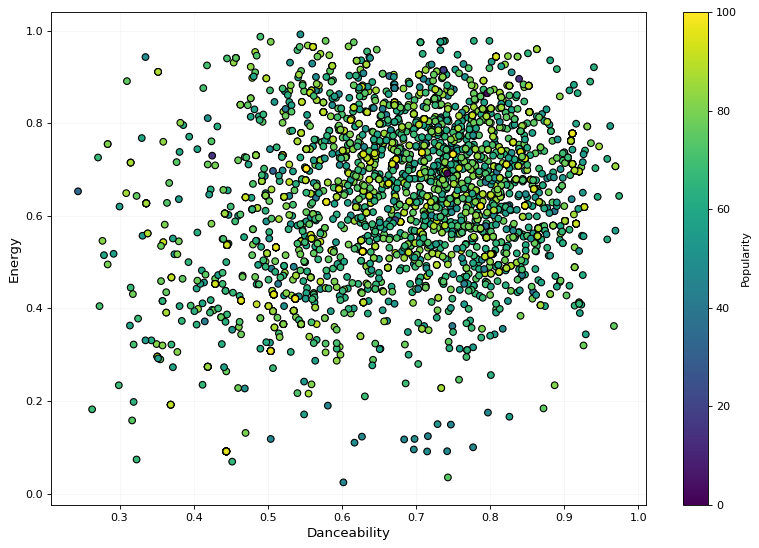

In [ ]:
plt.figure(figsize=(12, 8), dpi=80, )

scatterPlot = plt.scatter(df["Danceability"], df["Energy"], c=df["Popularity"],
                          cmap="viridis", edgecolor="black")
plt.xlabel("Danceability", fontsize=12)
plt.ylabel("Energy", fontsize=12)
plt.colorbar(scatterPlot, label="Popularity")
plt.grid(alpha=0.1)
plt.tick_params(axis="both", labelcolor="black")
plt.show()